# Importing required Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sci
import numpy as np

import warnings     # To ignore warnings
warnings.filterwarnings('ignore')

# Importing Machine Learning libraries
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

# Libraries for Validation Matrix
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error




# Loading Data

In [80]:
data = pd.read_excel('Project_Operations _Research _Analyst.xlsx')

# Performing Data Analysis using Python

## 1.  Data Cleaning
### i.    Checking duplicate values
### ii.   Checking missing values
### iii.  Drop columns/duplcates
## 2.  Data Visualisation using Seaborn
## 3.  Descriptive Analysis on each factor
### i.    Detailed Descriptive Statistics/Summary
## 4.  Feature Engineering
### ii.   Outlier Detection and Treatment of outliers
### iii.  ODT Plots (Visualisation)
## 5.  Exploratory Data Analysis (E-D-A)
### i.    Multi-variate data analysis
### ii.   Correlation Matrix using heat maps
### iii.  VIF - Measure of multicollinearity
### iv.  Correlation of each independent variable w.r.t the Target variable
## 6.  Model Building
### i.    Model Selection and Execution
### ii.   Model Accuracy Measurement 
### iii.  Cross Validation
### iv.  Hyper parameter tuning - To tune the best model(using-best-params)




## Data Backup

In [6]:
data_copy = data

In [7]:
data

,SL. No.,Class,Age,time,adv_bookdays,weekday,month,monthday,demand,from_ind,to_ind,Fare
0,1,0,77.2,39,69,0,0,3,1,5,4,11854.27
1,2,0,45.3,34,10,4,1,11,1,2,4,14968.50
2,3,0,70.9,36,17,1,2,7,1,1,4,5859.32
3,4,0,35.1,31,28,1,4,9,1,7,4,2774.19
4,5,0,41.8,33,17,4,6,28,1,7,4,3833.66
...,...,...,...,...,...,...,...,...,...,...,...,...
4994,6230,1,69.7,40,58,3,0,20,1,1,2,13229.45
4995,6231,0,74.5,30,32,4,8,1,1,3,2,5260.76
4996,6232,0,57.1,26,47,3,4,11,2,1,2,3287.15
4997,6233,0,14.6,28,18,6,7,20,1,1,2,5959.29


#  Data Cleaning

## Checking Duplicate Values

In [8]:
data.duplicated().value_counts()

False    4999
dtype: int64

## Checking Missing Values

In [9]:
data.isnull().sum()

SL. No.         0
Class           0
Age             0
time            0
adv_bookdays    0
weekday         0
month           0
monthday        0
demand          0
from_ind        0
to_ind          0
Fare            0
dtype: int64

## Data Info

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SL. No.       4999 non-null   int64  
 1   Class         4999 non-null   int64  
 2   Age           4999 non-null   float64
 3   time          4999 non-null   int64  
 4   adv_bookdays  4999 non-null   int64  
 5   weekday       4999 non-null   int64  
 6   month         4999 non-null   int64  
 7   monthday      4999 non-null   int64  
 8   demand        4999 non-null   int64  
 9   from_ind      4999 non-null   int64  
 10  to_ind        4999 non-null   int64  
 11  Fare          4999 non-null   float64
dtypes: float64(2), int64(10)
memory usage: 468.8 KB


In [11]:
# There is no null or duplicate value in the data

In [12]:
# Data Cleaning and Analysis

In [13]:
data.drop('SL. No.',axis=1,inplace = True) # There is no need of SL. No

# Data Visualisation using Seaborn

In [14]:
# Class

<AxesSubplot:xlabel='Class', ylabel='count'>

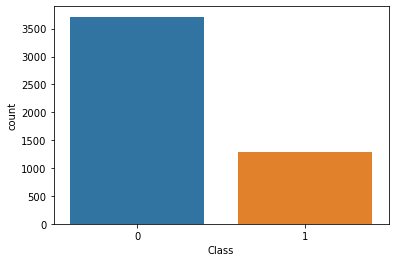

In [15]:
sns.countplot(data['Class'])

In [16]:
#Age

<AxesSubplot:xlabel='Age', ylabel='Density'>

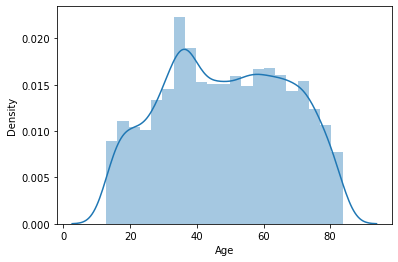

In [17]:
sns.distplot(data['Age'])

<AxesSubplot:xlabel='Age', ylabel='Fare'>

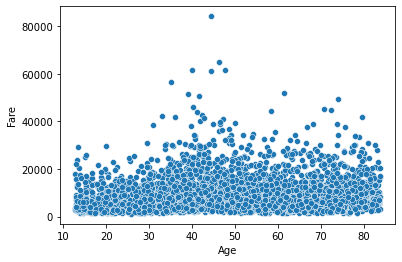

In [18]:
sns.scatterplot(data['Age'], data['Fare'])

In [19]:
# Time

<AxesSubplot:xlabel='time', ylabel='Density'>

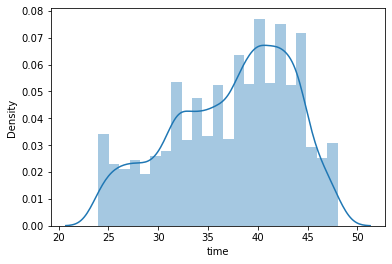

In [20]:
sns.distplot(data['time'])

In [21]:
# Advanced Book Days

<AxesSubplot:xlabel='adv_bookdays', ylabel='Density'>

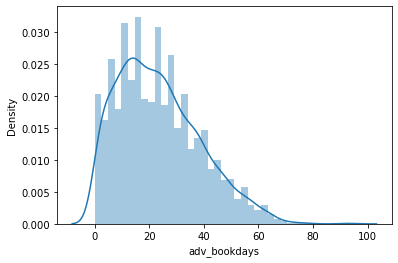

In [22]:
sns.distplot(data['adv_bookdays'])

<AxesSubplot:xlabel='adv_bookdays', ylabel='Fare'>

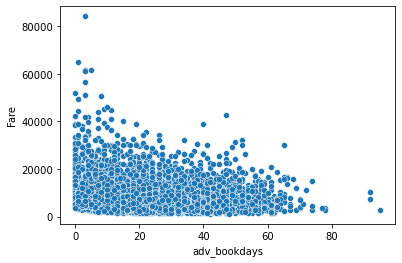

In [23]:
sns.scatterplot(data['adv_bookdays'],data['Fare'])

In [24]:
# Weekday

<AxesSubplot:xlabel='weekday', ylabel='count'>

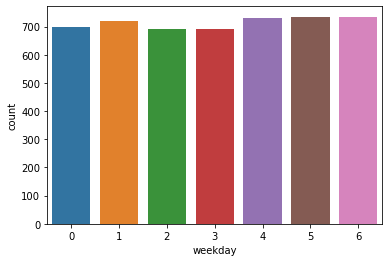

In [25]:
sns.countplot(data['weekday'])

<AxesSubplot:xlabel='weekday', ylabel='Fare'>

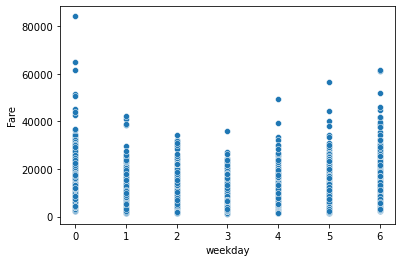

In [84]:
sns.scatterplot(data['weekday'],data['Fare'])

In [26]:
# Month

<AxesSubplot:xlabel='month', ylabel='count'>

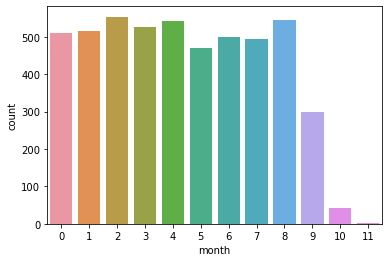

In [27]:
sns.countplot(data['month'])

<AxesSubplot:xlabel='month', ylabel='Fare'>

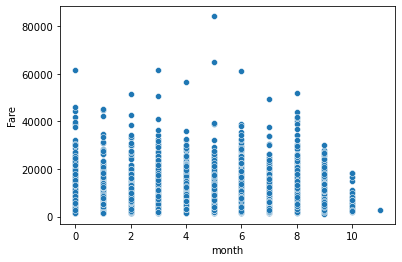

In [28]:
sns.scatterplot(data['month'], data['Fare'])

In [29]:
# Month_day

<AxesSubplot:xlabel='monthday', ylabel='Fare'>

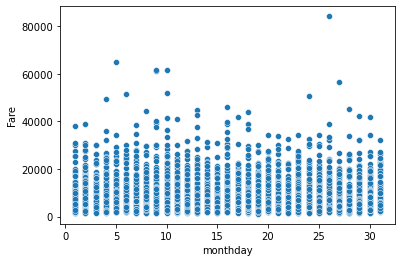

In [30]:
sns.scatterplot(data['monthday'], data['Fare'])

In [31]:
# Demand

<AxesSubplot:xlabel='demand', ylabel='count'>

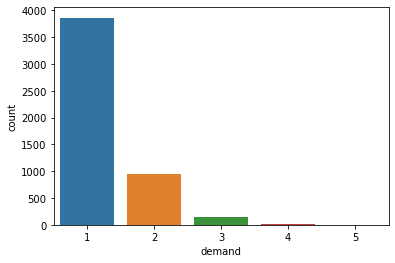

In [32]:
sns.countplot(data['demand'])

<AxesSubplot:xlabel='demand', ylabel='Fare'>

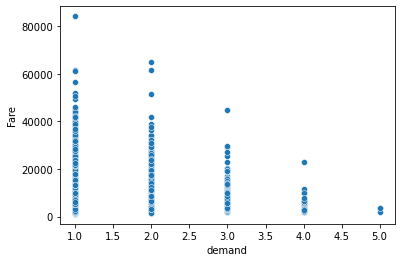

In [33]:
sns.scatterplot(x =data['demand'], y = data['Fare'])

In [34]:
catg_data = data[['demand','Class']]

In [35]:
catg_data

,demand,Class
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
4994,1,1
4995,1,0
4996,2,0
4997,1,0


In [36]:
target = data[['Fare']]

In [37]:
target

,Fare
0,11854.27
1,14968.50
2,5859.32
3,2774.19
4,3833.66
...,...
4994,13229.45
4995,5260.76
4996,3287.15
4997,5959.29


In [38]:
data.drop(['demand','Class','Fare'],axis = 1,inplace = True)

In [39]:
data

,Age,time,adv_bookdays,weekday,month,monthday,from_ind,to_ind
0,77.2,39,69,0,0,3,5,4
1,45.3,34,10,4,1,11,2,4
2,70.9,36,17,1,2,7,1,4
3,35.1,31,28,1,4,9,7,4
4,41.8,33,17,4,6,28,7,4
...,...,...,...,...,...,...,...,...
4994,69.7,40,58,3,0,20,1,2
4995,74.5,30,32,4,8,1,3,2
4996,57.1,26,47,3,4,11,1,2
4997,14.6,28,18,6,7,20,1,2


# Descriptive Analysis on each factor

## Descriptive Statistics Function

In [41]:
def custom_summary(data):
    
    from collections import OrderedDict # Import library to use OrderedDict
    result = []  # Create an empty list
    
    
    #Iterating all the columns in the data for descriptive Statistics
    for col in data.columns:
        stats = OrderedDict({'Feature Name':col,
            'Count':data[col].count(),
            'Min':data[col].min(),
            'Quartile 1':data[col].quantile(0.25),
            'Median':data[col].median(),
            'Mean':data[col].mean(),
            'Quartile 3':data[col].quantile(0.75),  
            'IQR':(data[col].quantile(0.75)-data[col].quantile(0.25)),
            'Max':data[col].max(),
            'Skewness':data[col].skew(),
            'Variance':data[col].var(),
            'Standard Deviation': data[col].std(),        
            'Kurtosis':data[col].kurt()
        })
        
    # Custom comment for identifying skewness
        if data[col].skew() < -1:
            skew_label = 'Highly -ve skewed'
        elif -1 <= data[col].skew() < -0.5:
            skew_label = 'Moderately -ve skewed'
        elif -0.5 <= data[col].skew() < 0:
            skew_label = 'Fairly symmetric -ve skewed'
        elif 0 <= data[col].skew() < 0.5:
            skew_label = 'Fairly symmetric +ve skewed'    
        elif 0.5 <= data[col].skew() < 1:
            skew_label = 'Moderately +ve skewed'
        elif data[col].skew() > 1:
            skew_label = 'Highly +ve skewed'
        else:
            skew_label = 'Error'
            
        stats['Skewness Comment'] = skew_label
        
        up_limit = stats['Quartile 3'] + 1.5*stats['IQR']
        low_limit = stats['Quartile 1'] - 1.5*stats['IQR']
        
        if len([x for x in data[col] if x < low_limit or x > up_limit]) > 0:
            outlier_comment = 'has outlier'
        else:
            outlier_comment = 'no outlier'
        
        stats['Outlier Comment'] = outlier_comment
                
                
        
        result.append(stats)
    summary_df = pd.DataFrame(data = result)
    return summary_df
    
        

## Descriptive Statistical Summary

In [42]:
custom_summary(data)

,Feature Name,Count,Min,Quartile 1,Median,Mean,Quartile 3,IQR,Max,Skewness,Variance,Standard Deviation,Kurtosis,Skewness Comment,Outlier Comment
0,Age,4999,12.8,33.9,48.1,48.478436,64.1,30.2,83.7,-0.014592,347.275033,18.635317,-1.039805,Fairly symmetric -ve skewed,no outlier
1,time,4999,24.0,33.0,38.0,37.325465,42.0,9.0,48.0,-0.417086,35.907056,5.992250,-0.724998,Fairly symmetric -ve skewed,no outlier
2,adv_bookdays,4999,0.0,12.0,21.0,23.414283,33.0,21.0,95.0,0.654529,229.267111,15.141569,0.038825,Moderately +ve skewed,has outlier
3,weekday,4999,0.0,1.0,3.0,3.035207,5.0,4.0,6.0,-0.024668,4.026371,2.006582,-1.263425,Fairly symmetric -ve skewed,no outlier
4,month,4999,0.0,2.0,4.0,4.331266,7.0,5.0,11.0,0.073534,7.937059,2.817279,-1.168961,Fairly symmetric +ve skewed,no outlier
5,monthday,4999,1.0,8.0,15.0,15.372474,23.0,15.0,31.0,0.076603,78.542307,8.862410,-1.197056,Fairly symmetric +ve skewed,no outlier
6,from_ind,4999,1.0,2.0,3.0,3.606721,5.0,3.0,7.0,0.233316,3.962548,1.990615,-1.251081,Fairly symmetric +ve skewed,no outlier
7,to_ind,4999,1.0,2.0,4.0,3.985997,6.0,4.0,7.0,-0.217440,4.175074,2.043300,-1.203157,Fairly symmetric -ve skewed,no outlier


# Feature Engineering

## Outlier Detection and Treatment of outliers

In [43]:
def replace_outlier(data,col,method = 'quartile',strategy='median'):
    
    col_data = data[col]
    
    # Using method 1 : Quartile
    
    if method == 'quartile':
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        IQR = q3-q1
        upper_limit = q3 + 1.5 * IQR
        lower_limit = q1 - 1.5 * IQR
    
    # Using method 2 : Standard Deviation
    elif method == 'standard deviation':
        col_mean = data[col].mean()
        col_std = data[col].std()
        limit = 2 *col_std 
        up_limit = col_mean + limit
        low_limit = col_mean - limit
    
    else :
        print("Pass a correct method")

    # Displaying the outliers
    
    outliers =  data.loc[(col_data < lower_limit) | (col_data >upper_limit),col]
    outliers_percentage = round(len(outliers) / len(data),2)
        
    if len(outliers) == 0:
        print(f'The {col} has no outlier')
    else:
        print(f'The {col} has {len(outliers)} outliers')
        print(f'Outlier percentage : {outliers_percentage}')
        print(f'The {col} has outlier values:',np.sort(np.array(outliers)))
        display ( data.loc[(col_data < lower_limit) | (col_data >upper_limit),col])
        
        
        # Replacing outliers
        # Using strategy 1 that is 'median'
        
    if strategy == 'median':
        data.loc[(col_data < lower_limit) | (col_data >upper_limit),col] =data[col].median()
        
        
    # Using strategy 2 that is 'mean'
        
    elif strategy == 'mean':
        data.loc[(col_data < low_limit )| (col_data >up_limit),col] =data[col].mean()
        
    else:
        print('Pass a correct Strategy')
            
    return data
            

## Building ODT(Outlier Detection Plots)

### ODT consists of three plots
### 1. Box Plots (Descriptive Statistics)
### 2. Distribution with outliers 
### 3. Distribution without outliers 

In [45]:
def ODT_plots(data,col):
    f,(ax1,ax2,ax3) = plt.subplots(1,3,figsize = (20,20))
    
    kwargs={'fontsize' :20, 'color':'black'} # kwargs for Common Arguments

    # Descriptive Stats
    sns.boxplot(data[col],ax = ax1,color='blue')
    ax1.set_title(col+' '+'boxplot',**kwargs)
    ax1.set_xlabel('boxplot',**kwargs)
    ax1.set_ylabel('values',**kwargs)

   # plotting histogram with outliers
    sns.distplot(data[col],ax = ax2,color='red',fit = sci.norm)
    ax2.axvline(data[col].mean(),color = 'green')
    ax2.axvline(data[col].median(),color = 'blue')
    ax2.set_title(col+' '+'histogram',**kwargs)
    ax2.set_xlabel('density',**kwargs)
    ax2.set_ylabel('values',**kwargs)
    
    # plotting histogram without outliers
    # Using above function of replacing outliers
    y = replace_outlier(data,col)
    sns.distplot(y[col],ax=ax3,color='red',fit=sci.norm)
    ax3.axvline(y[col].mean(),color = 'green')
    ax3.axvline(y[col].median(),color = 'blue')
    ax3.set_title(col+' '+'histogram without outliers',**kwargs)
    ax3.set_xlabel('density',**kwargs)
    ax3.set_ylabel('values',**kwargs)
    
    plt.show()
        


## ODT Plots (Visualisation)

#### ODT refers to as the Outlier Detection Plot which defines the visualisation tecnhnique in order to,give us a clear vision of the outlier summary stats viably representing the no.of outliers, the outlier values(data points),and the outlier percentage following a 3-graph approach as in a Boxlot, and two histograms' representing the visualisation,with or without outliers.By calling in the replace outier function inside the ODT function, we are replacing the outliers present in our data and dispaying the graphical representation for the same.

The Age has no outlier


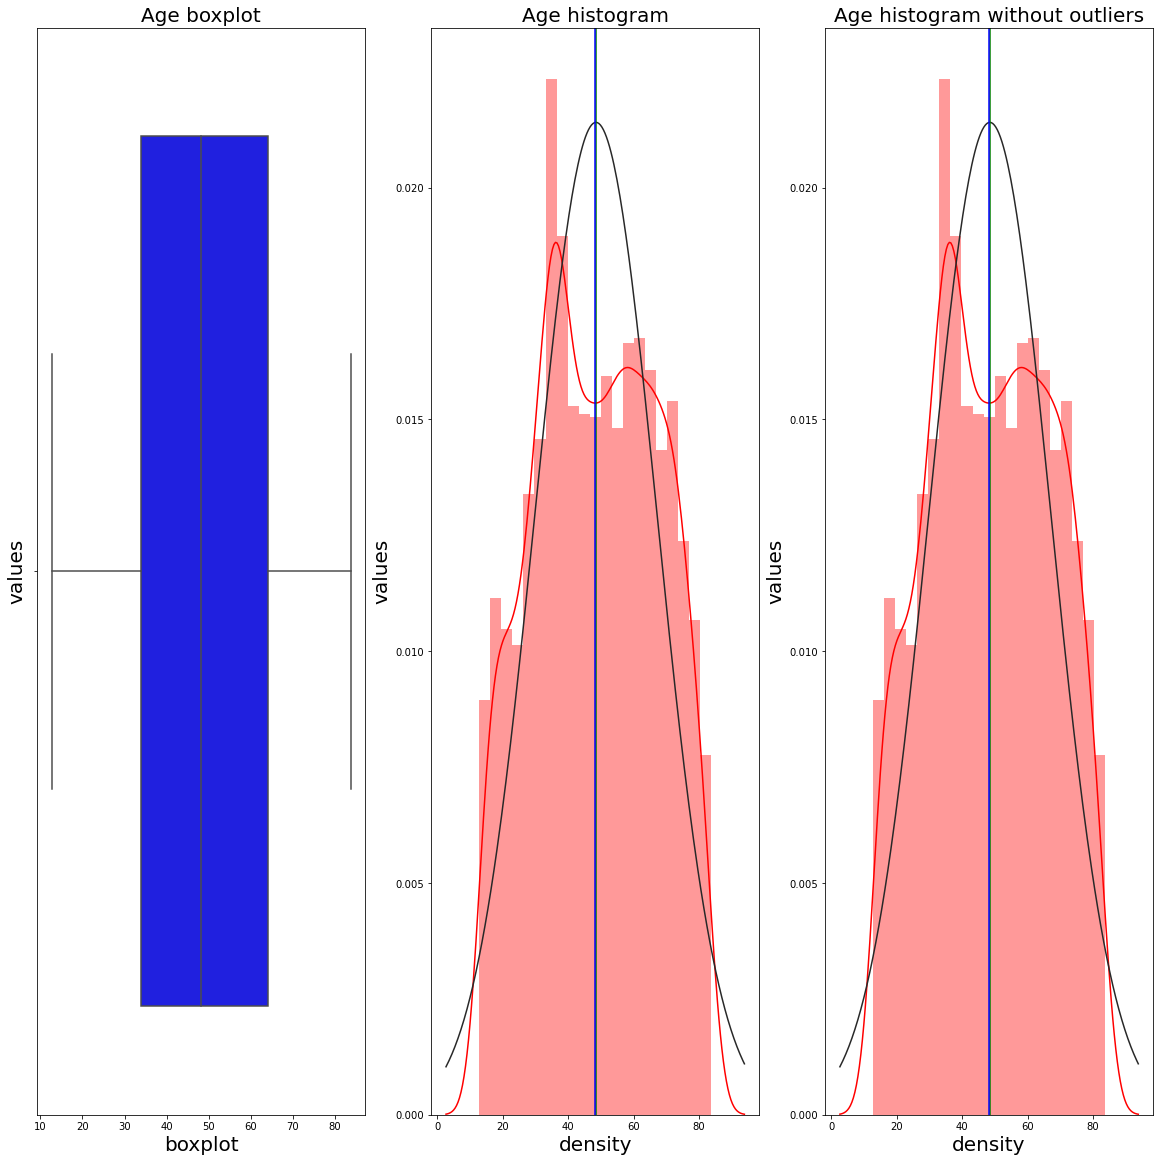

The time has no outlier


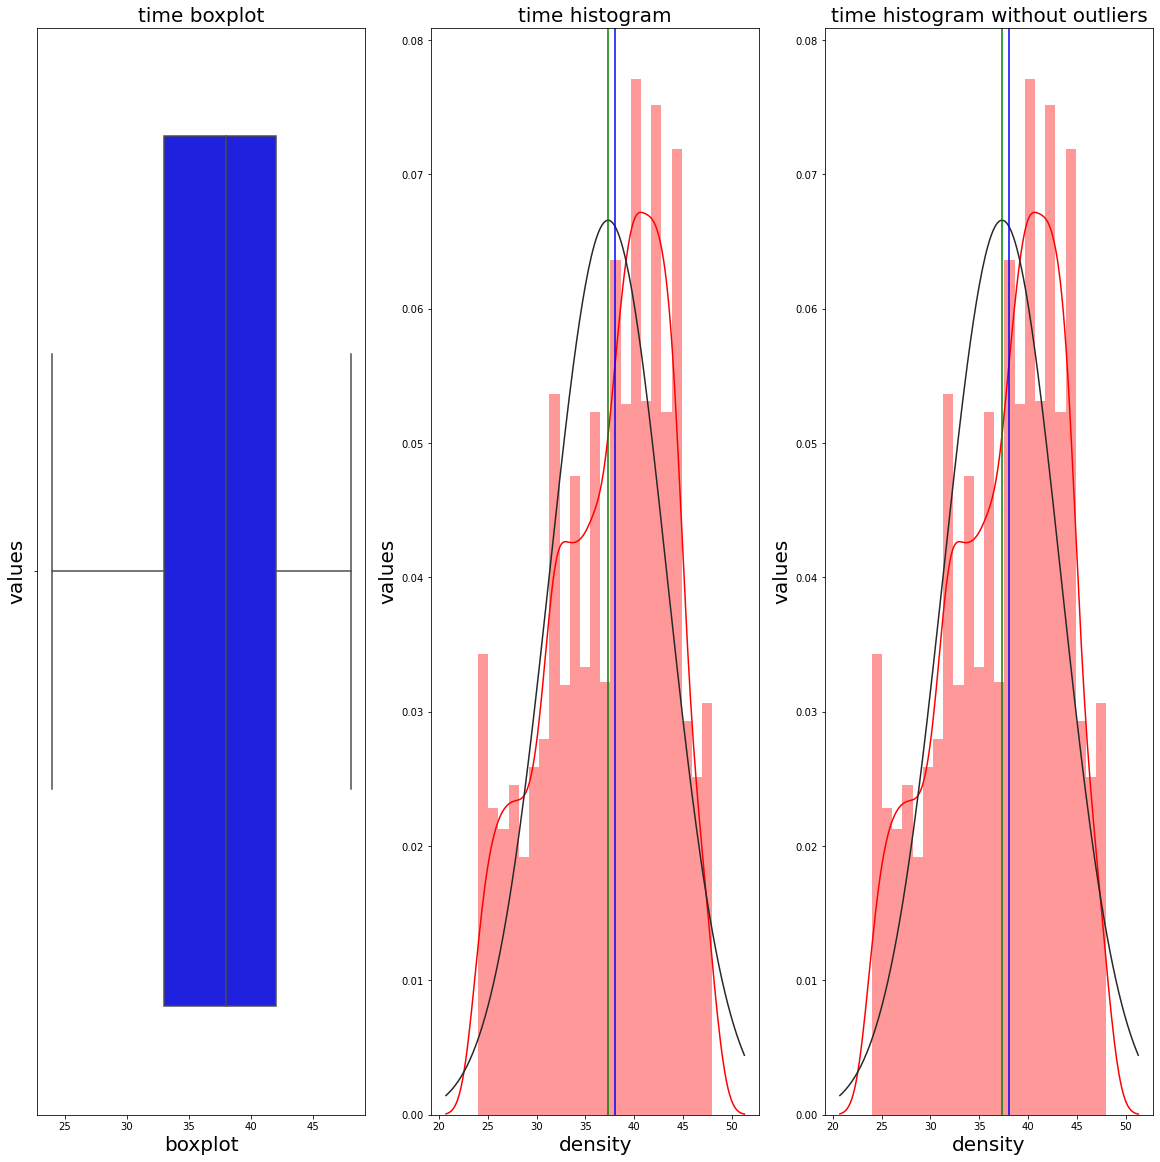

The adv_bookdays has 35 outliers
Outlier percentage : 0.01
The adv_bookdays has outlier values: [65 65 65 65 65 65 65 65 65 66 66 66 67 67 67 67 67 68 69 69 70 70 70 70
 71 72 74 74 74 77 78 78 92 92 95]


0       69
38      67
327     67
480     65
508     70
625     66
698     65
1249    78
1391    78
1392    65
1469    92
1499    74
1560    74
1643    67
1708    66
1774    65
1814    70
1837    74
2180    65
2381    69
2427    65
2433    92
2656    67
3219    70
3289    72
3511    66
3558    71
3585    95
3632    67
3781    68
3887    65
3968    77
4135    65
4749    65
4859    70
Name: adv_bookdays, dtype: int64

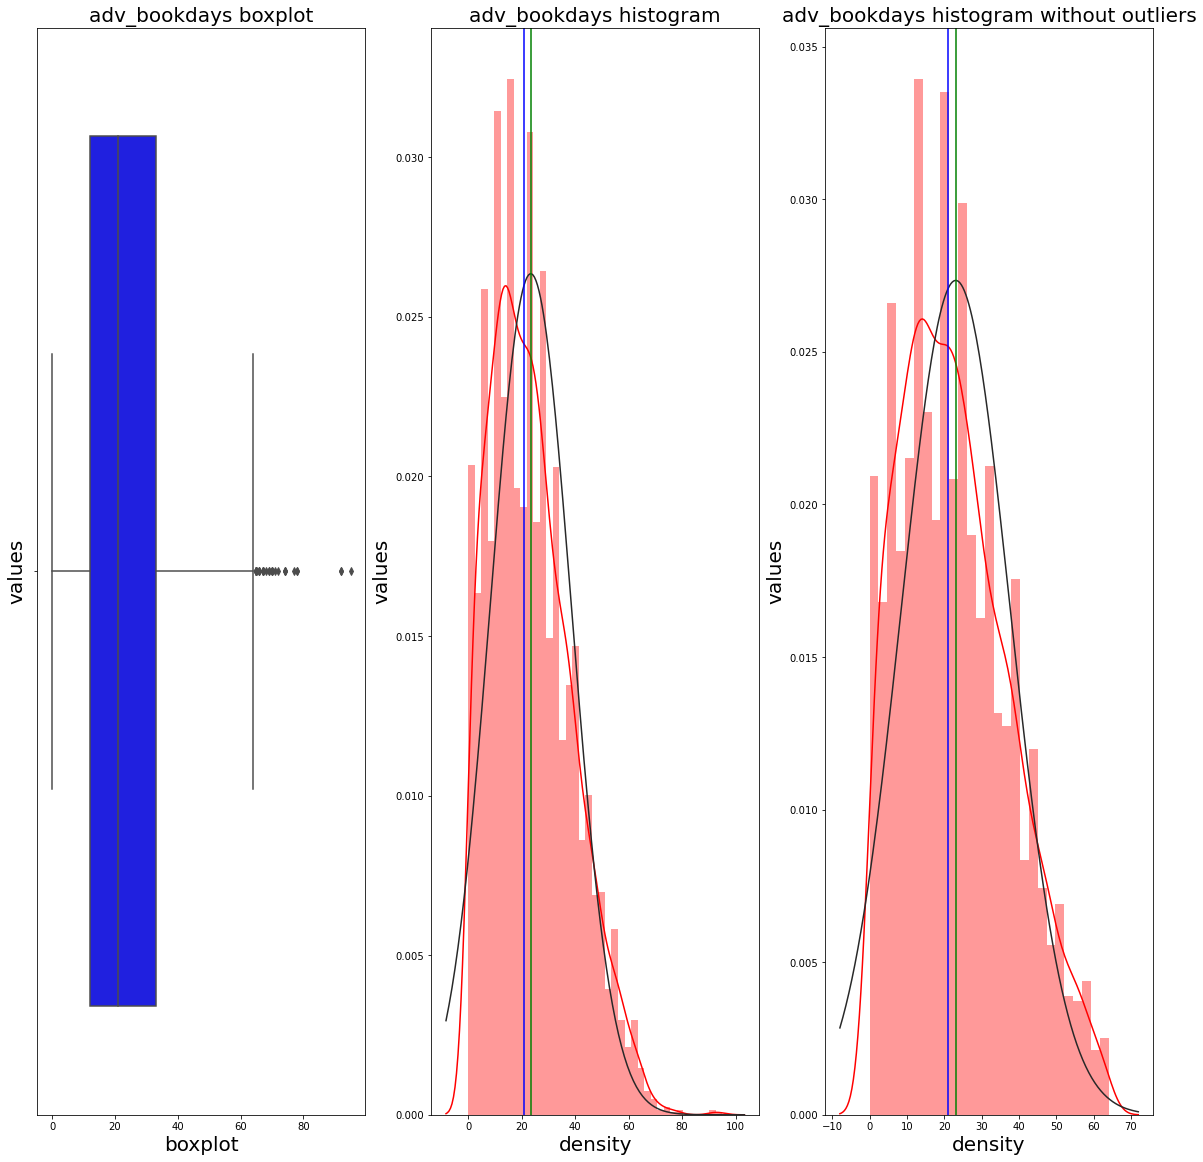

The weekday has no outlier


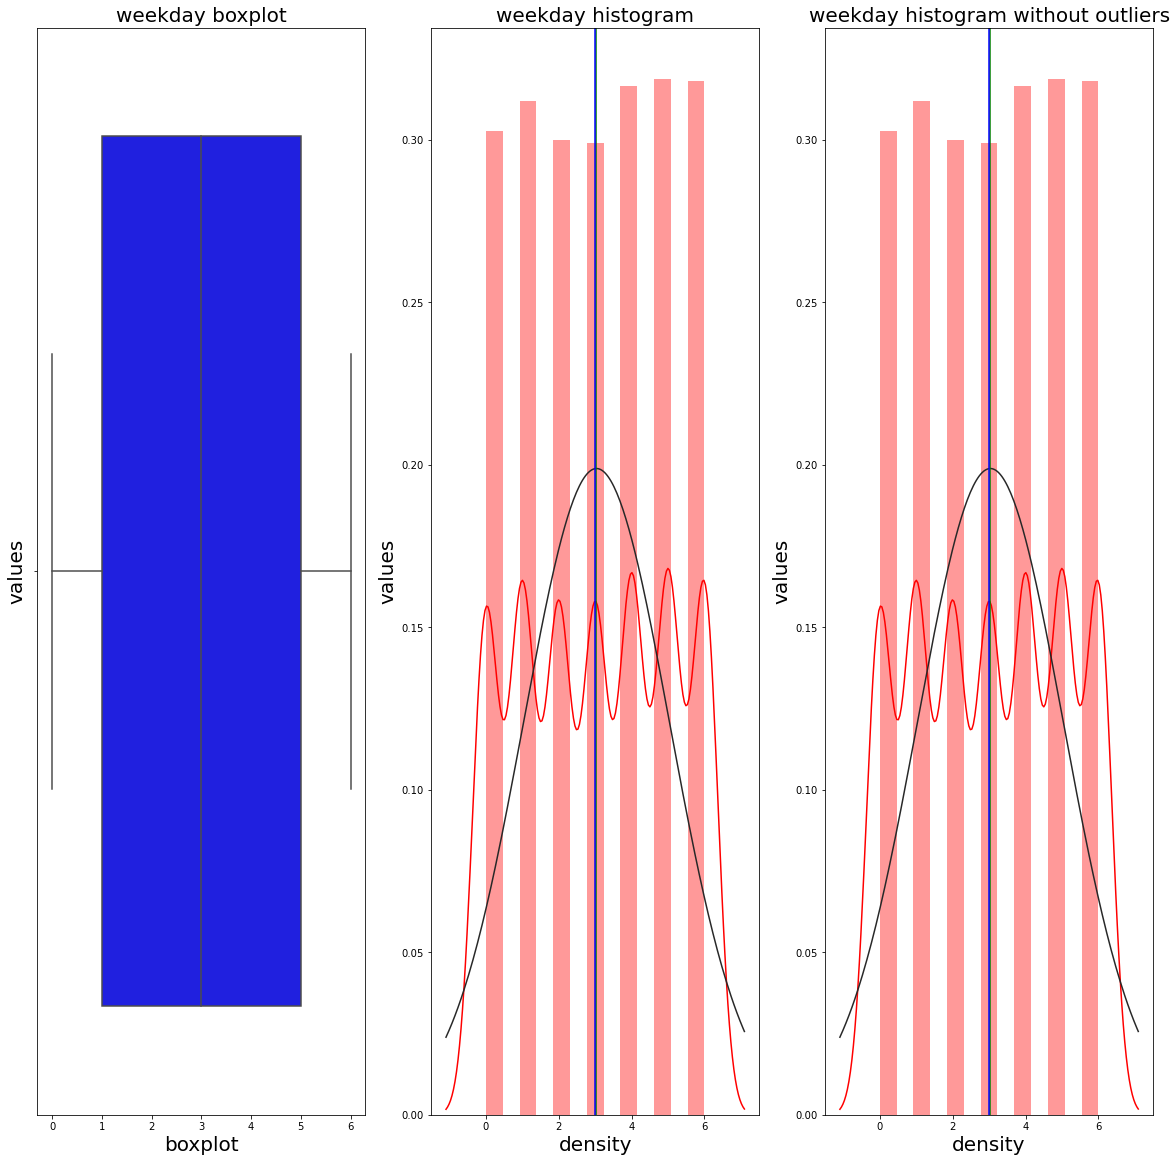

The month has no outlier


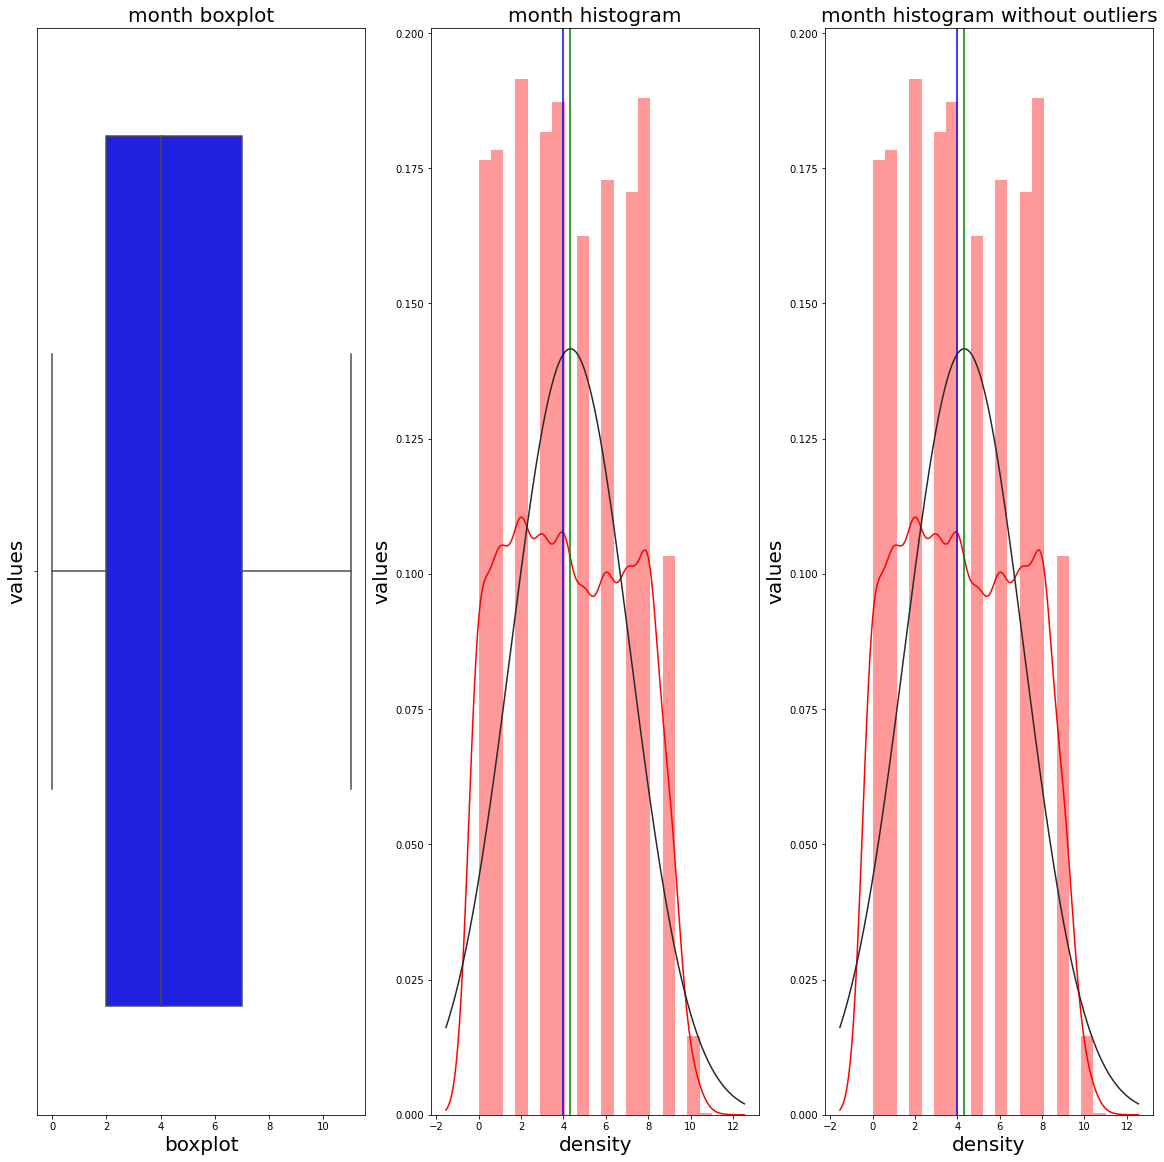

The monthday has no outlier


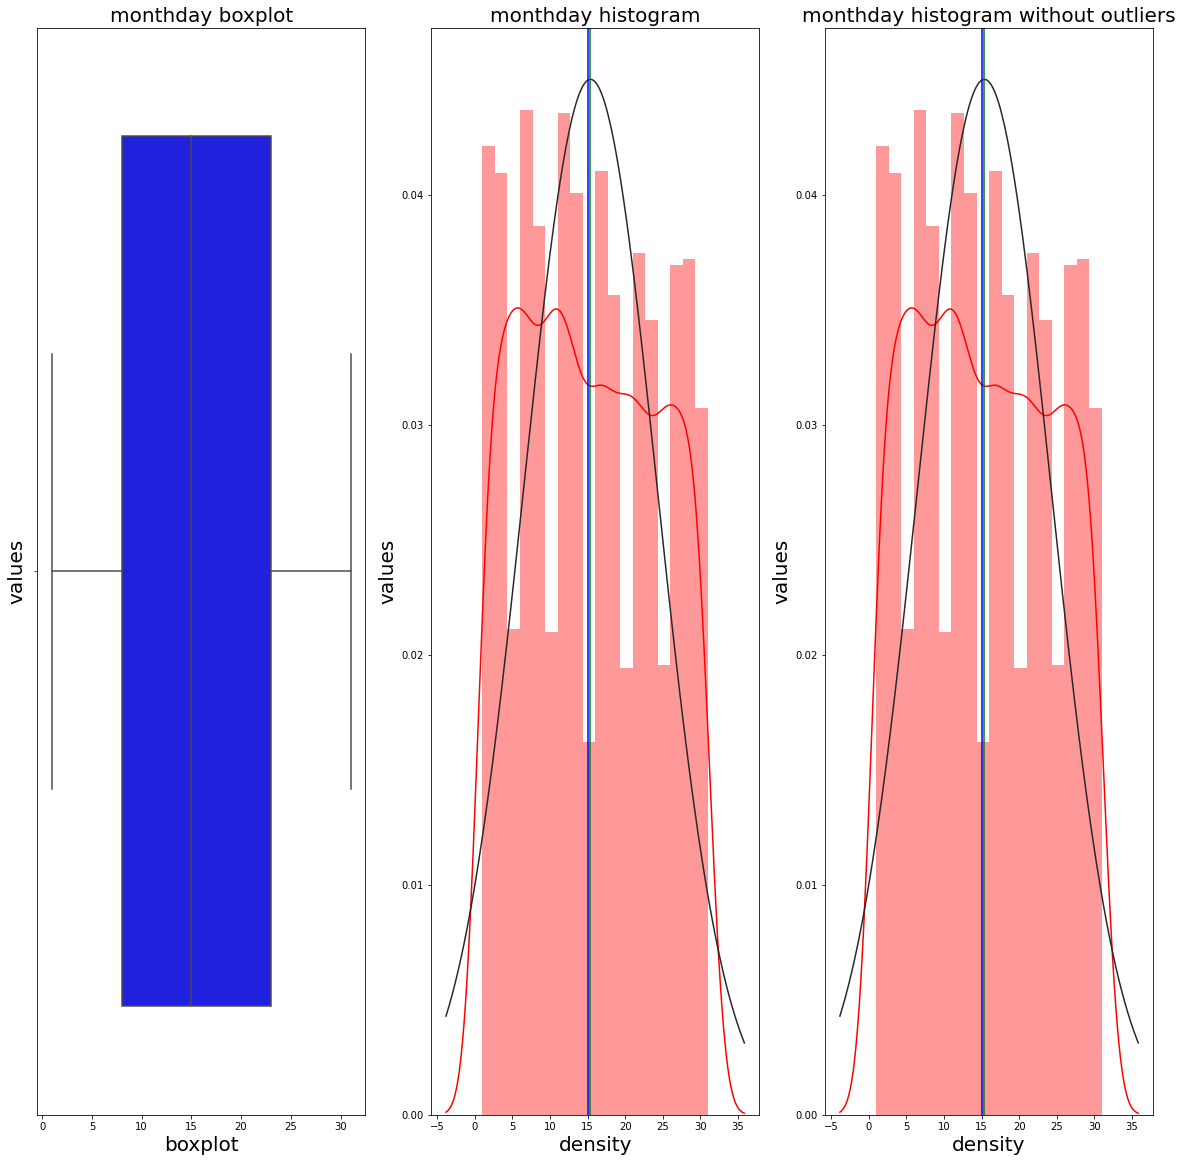

The from_ind has no outlier


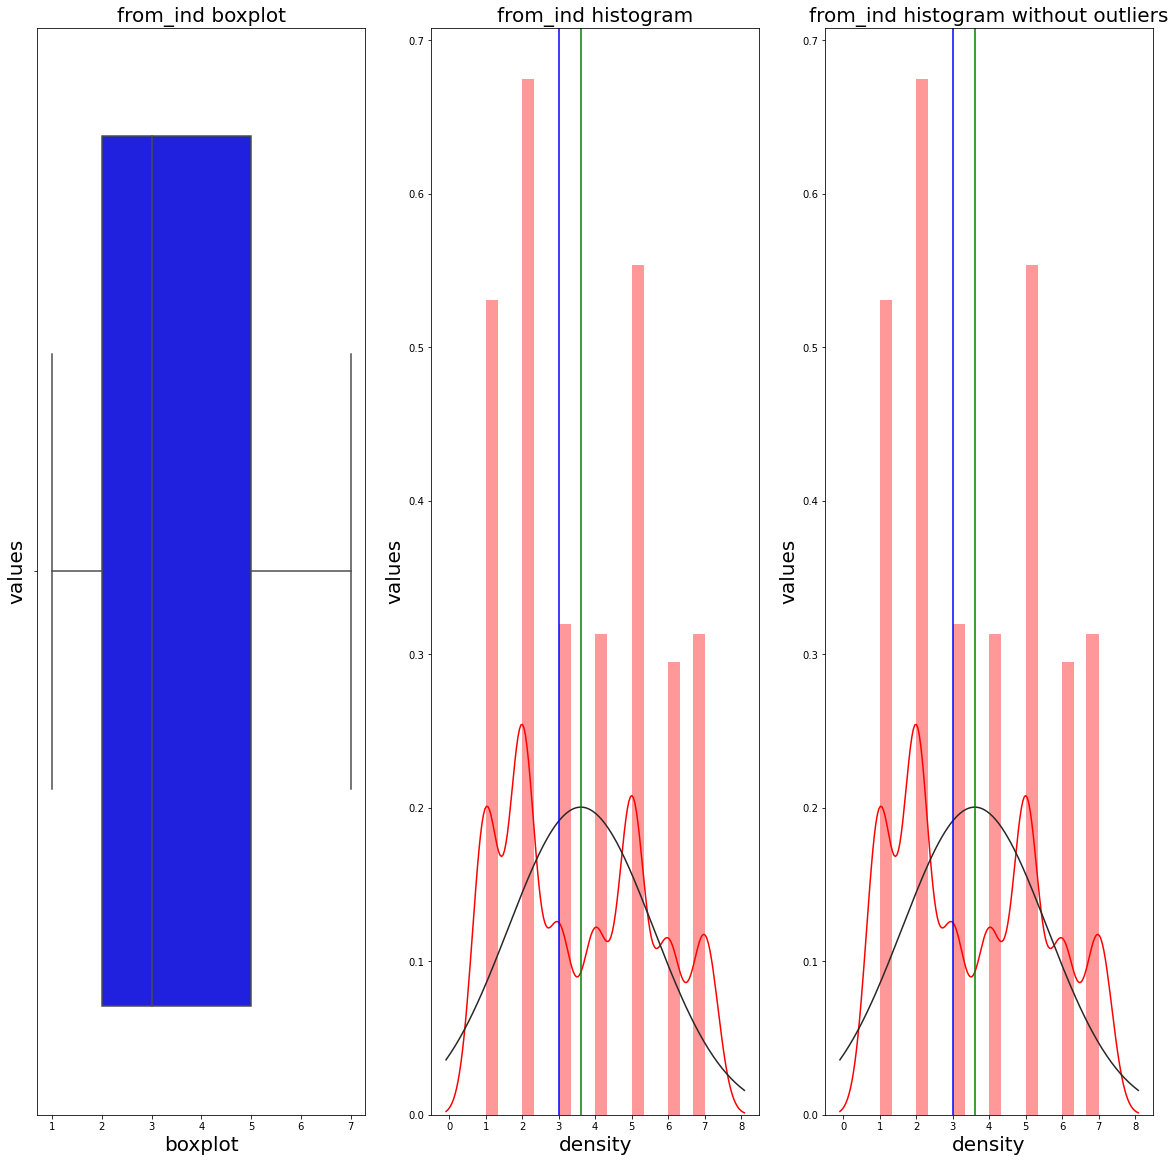

The to_ind has no outlier


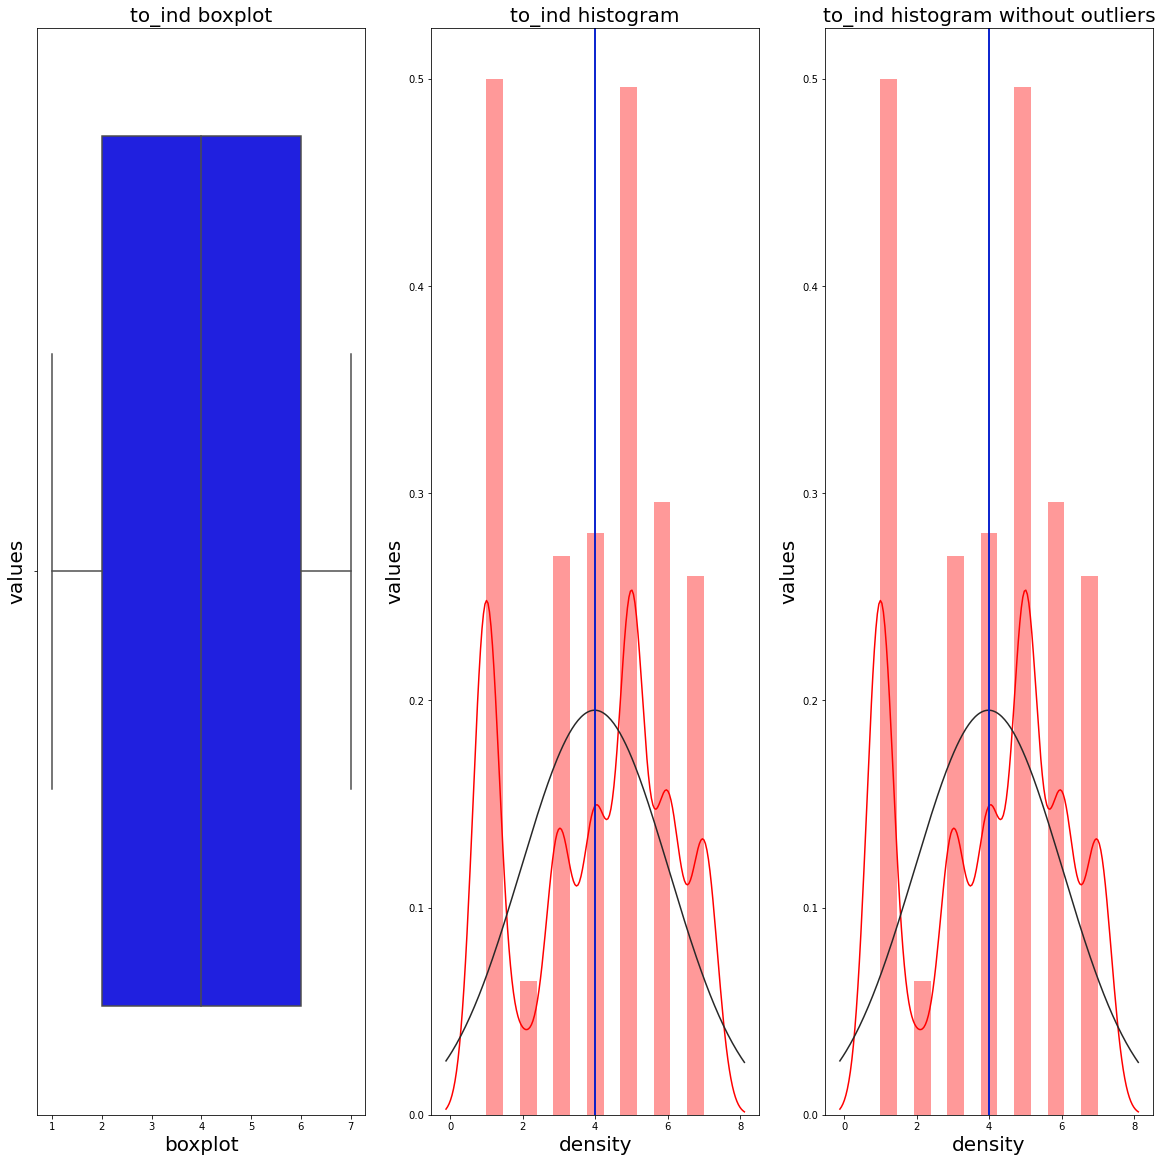

In [46]:
 for x in data.columns:
        ODT_plots(data,x)

## Summary statistics after replacing the outliers

In [47]:
custom_summary(data)

,Feature Name,Count,Min,Quartile 1,Median,Mean,Quartile 3,IQR,Max,Skewness,Variance,Standard Deviation,Kurtosis,Skewness Comment,Outlier Comment
0,Age,4999,12.8,33.9,48.1,48.478436,64.1,30.2,83.7,-0.014592,347.275033,18.635317,-1.039805,Fairly symmetric -ve skewed,no outlier
1,time,4999,24.0,33.0,38.0,37.325465,42.0,9.0,48.0,-0.417086,35.907056,5.992250,-0.724998,Fairly symmetric -ve skewed,no outlier
2,adv_bookdays,4999,0.0,12.0,21.0,23.065013,33.0,21.0,64.0,0.540254,212.980766,14.593861,-0.371202,Moderately +ve skewed,no outlier
3,weekday,4999,0.0,1.0,3.0,3.035207,5.0,4.0,6.0,-0.024668,4.026371,2.006582,-1.263425,Fairly symmetric -ve skewed,no outlier
4,month,4999,0.0,2.0,4.0,4.331266,7.0,5.0,11.0,0.073534,7.937059,2.817279,-1.168961,Fairly symmetric +ve skewed,no outlier
5,monthday,4999,1.0,8.0,15.0,15.372474,23.0,15.0,31.0,0.076603,78.542307,8.862410,-1.197056,Fairly symmetric +ve skewed,no outlier
6,from_ind,4999,1.0,2.0,3.0,3.606721,5.0,3.0,7.0,0.233316,3.962548,1.990615,-1.251081,Fairly symmetric +ve skewed,no outlier
7,to_ind,4999,1.0,2.0,4.0,3.985997,6.0,4.0,7.0,-0.217440,4.175074,2.043300,-1.203157,Fairly symmetric -ve skewed,no outlier


### Observation:
#### 1.  All the outliers have been replaced and hence we can find no-outlier comment for all these features,
#### 2. The skewness have been fairly reduced,
#### 3. Data is fairly symmetric for the respective features,i.e the distribution of our data points are close to be referred as normal distribution.

In [48]:
# Joining categorical variables

In [49]:
data = data.join(catg_data)

In [50]:
data

,Age,time,adv_bookdays,weekday,month,monthday,from_ind,to_ind,demand,Class
0,77.2,39,21,0,0,3,5,4,1,0
1,45.3,34,10,4,1,11,2,4,1,0
2,70.9,36,17,1,2,7,1,4,1,0
3,35.1,31,28,1,4,9,7,4,1,0
4,41.8,33,17,4,6,28,7,4,1,0
...,...,...,...,...,...,...,...,...,...,...
4994,69.7,40,58,3,0,20,1,2,1,1
4995,74.5,30,32,4,8,1,3,2,1,0
4996,57.1,26,47,3,4,11,1,2,2,0
4997,14.6,28,18,6,7,20,1,2,1,0


In [51]:
# Joining Target variable

In [52]:
data = data.join(target)

In [53]:
data

,Age,time,adv_bookdays,weekday,month,monthday,from_ind,to_ind,demand,Class,Fare
0,77.2,39,21,0,0,3,5,4,1,0,11854.27
1,45.3,34,10,4,1,11,2,4,1,0,14968.50
2,70.9,36,17,1,2,7,1,4,1,0,5859.32
3,35.1,31,28,1,4,9,7,4,1,0,2774.19
4,41.8,33,17,4,6,28,7,4,1,0,3833.66
...,...,...,...,...,...,...,...,...,...,...,...
4994,69.7,40,58,3,0,20,1,2,1,1,13229.45
4995,74.5,30,32,4,8,1,3,2,1,0,5260.76
4996,57.1,26,47,3,4,11,1,2,2,0,3287.15
4997,14.6,28,18,6,7,20,1,2,1,0,5959.29


# Exploratory Data Analysis (E-D-A)

## Multi-variate data analysis

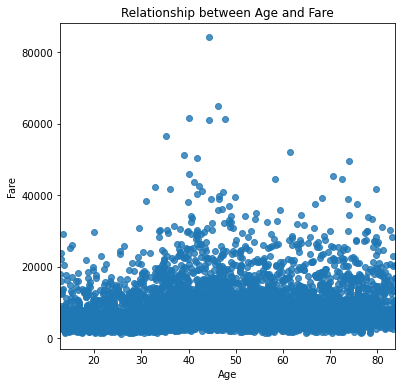

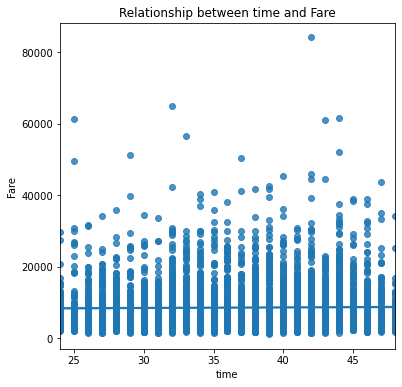

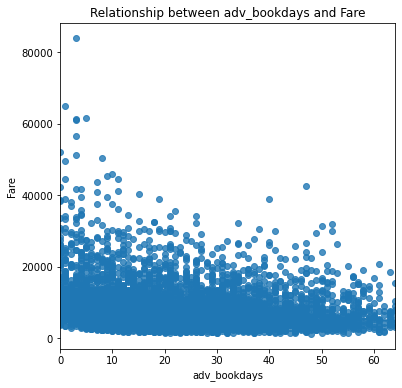

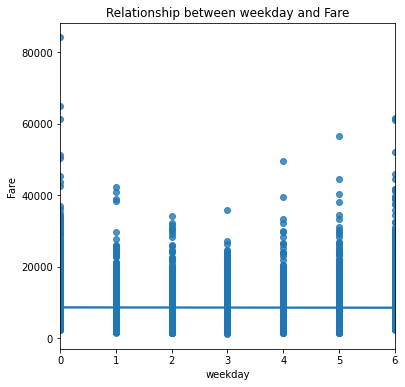

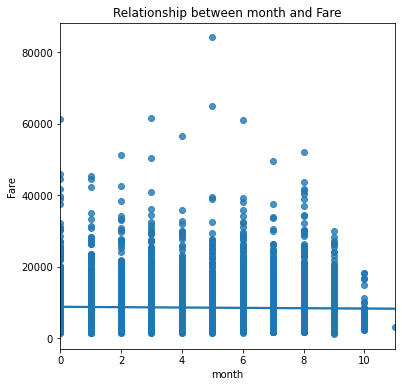

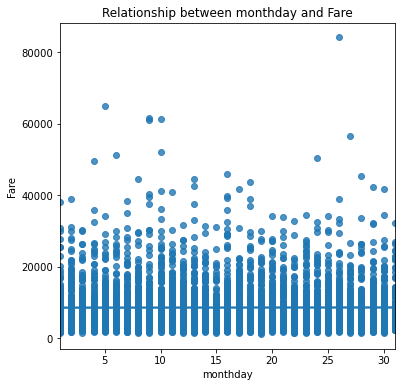

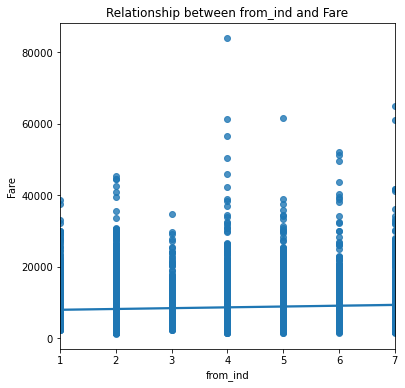

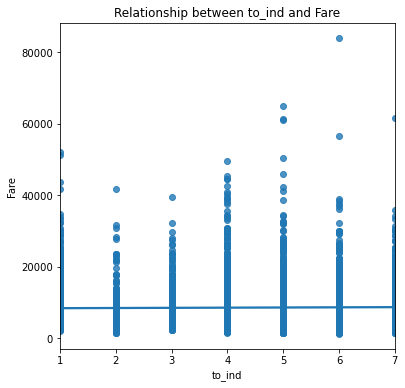

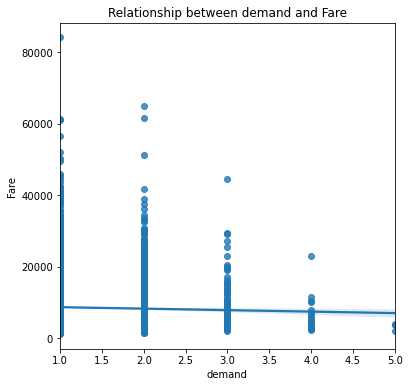

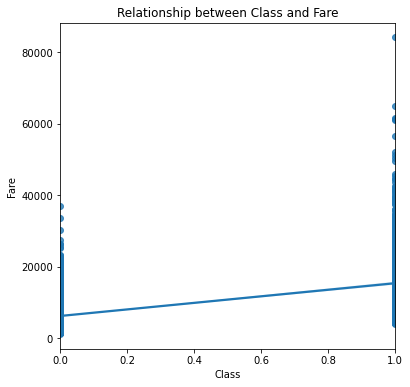

In [54]:
# multivariate data analysis using regression plots
for col in data.columns:
    if col!= 'Fare':
        f,ax1 = plt.subplots(figsize=(6,6))
        sns.regplot(x=data[col],y = data['Fare'],ax = ax1).set_title(f'Relationship between {col} and Fare')
    

## Correlation Matrix using heat maps

<AxesSubplot:>

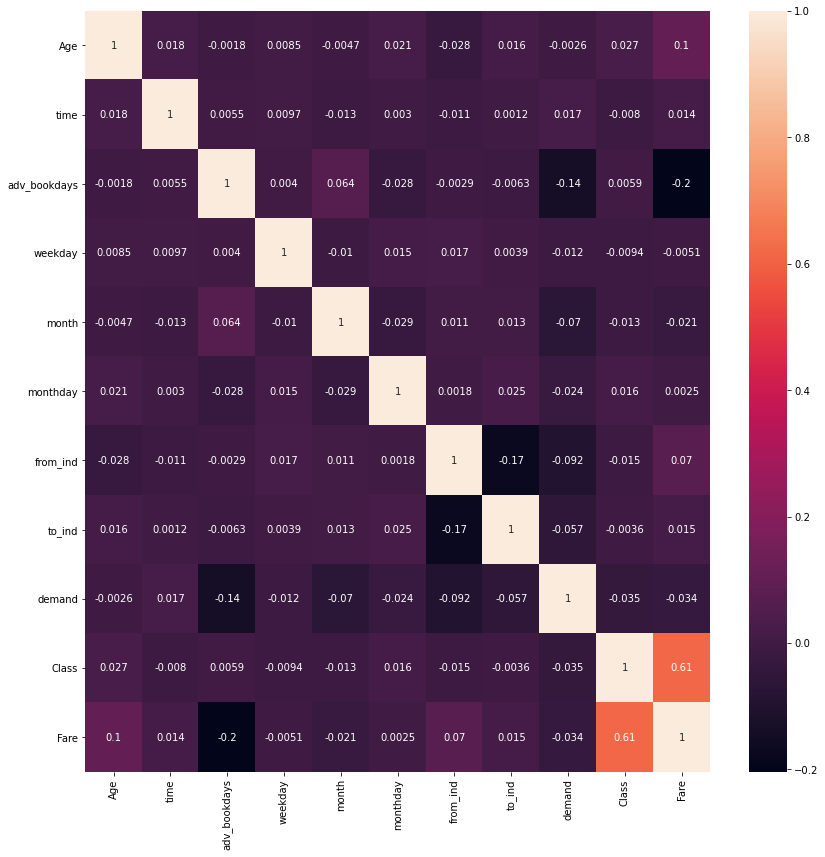

In [56]:
f,ax = plt.subplots(figsize=(14,14))
sns.heatmap(data.corr(),annot=True) # annot adds data value to each cell,the value is visible just bcz of this)

## VIF - Measure of multicollinearity

In [57]:
# VIF (Variance Inflation Factor)

In [58]:
def vif_collinearity(ind_var):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    result = pd.DataFrame()
    result['vif_factor'] = [variance_inflation_factor(ind_var.values,i) for i in range(ind_var.shape[1])]
    result['features'] = ind_var.columns
    
    return(result)

In [59]:
vif_collinearity(data.drop('Fare',axis = 1))

,vif_factor,features
0,7.142292,Age
1,19.451073,time
2,3.406098,adv_bookdays
3,3.204328,weekday
4,3.258768,month
5,3.860164,monthday
6,4.067283,from_ind
7,4.585255,to_ind
8,5.958264,demand
9,1.340450,Class


## Correlation of each independent variable w.r.t the Target variable

In [61]:
def corr_with_target(data,target_col):
    ind_var = data.drop([target_col],axis=1).columns
    corr_result = []
    for col in ind_var:
        corr_result.append(data[target_col].corr(data[col]))
    result = pd.DataFrame([ind_var,corr_result],index = ['Variables','Correlation']).T.sort_values('Correlation',ascending=False)
    return(result)
    

In [62]:
corr_with_target(data,'Fare')

,Variables,Correlation
9,Class,0.614491
0,Age,0.104229
6,from_ind,0.0696816
7,to_ind,0.0149389
1,time,0.0140156
5,monthday,0.00253149
3,weekday,-0.00514798
4,month,-0.0206741
8,demand,-0.0341715
2,adv_bookdays,-0.203715


# Model Building


In [82]:
# Proceeding for Model Building
#1. Normal Model Building with train/test split
#2. Cross validation
#3. Performing hyperparameter tuning

## Model Selection and Execution

In [64]:
def train_and_test_split(data,tcol,test_size=0.3):
    
    x = data.drop(tcol,axis=1)
    y = data[tcol]
    
    return(train_test_split(x,y,test_size=test_size,random_state=50))

In [65]:
def build_model(mname,m,data,tcol):
    
    x_train,x_test,y_train,y_test = train_and_test_split(data,tcol)
    m.fit(x_train,y_train)
    y_pred = m.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    r2score =r2_score(y_test,y_pred)
    
    
    result=[mname,rmse,r2score]
    
    
    return result

In [66]:
#Building Multiple Models:

def mul_models(data,tcol):
    col = ['Model Name','RMSE','Rsquare']
    result = pd.DataFrame(columns=col)
    result.loc[len(result)] = build_model('Linear Regression',LinearRegression(),data,'Fare')
    result.loc[len(result)] = build_model('Lasso Regression',Lasso(),data,'Fare')
    result.loc[len(result)] = build_model('Ridge Regression',Ridge(),data,'Fare')
    result.loc[len(result)] = build_model('Decision Tree Regressor',DecisionTreeRegressor(),data,'Fare')
    result.loc[len(result)] = build_model('KNeighbor',KNeighborsRegressor(),data,'Fare')
    result.loc[len(result)] = build_model('SVM',SVR(),data,'Fare')
    result.loc[len(result)] = build_model('Adaboost',AdaBoostRegressor(),data,'Fare')
    result.loc[len(result)] = build_model('Gradient Boost',GradientBoostingRegressor(),data,'Fare')
    result.loc[len(result)] = build_model('XGBoost',XGBRegressor(),data,'Fare')
    result.loc[len(result)] = build_model('Random Forest',RandomForestRegressor(),data,'Fare')
    return result


## Model Accuracy Measurement

In [67]:
mul_models(data,'Fare')

,Model Name,RMSE,Rsquare
0,Linear Regression,4737.015638,0.473002
1,Lasso Regression,4737.029363,0.472999
2,Ridge Regression,4737.185139,0.472964
3,Decision Tree Regressor,5663.304402,0.246750
4,KNeighbor,6590.949168,-0.020223
5,SVM,6814.268433,-0.090530
6,Adaboost,5891.187398,0.184911
7,Gradient Boost,3270.059747,0.748863
8,XGBoost,3360.764915,0.734738
9,Random Forest,3936.032833,0.636155


## Cross Validation

In [68]:
# Building model with Cross Validation

def kfold_cv(x,y,fold=10):
    
    score_lr = cross_val_score(LinearRegression(),x,y,cv=fold)
    score_lasso = cross_val_score(Lasso(),x,y,cv=fold)
    score_ridge = cross_val_score(Ridge(),x,y,cv=fold)
    score_dt = cross_val_score(DecisionTreeRegressor(),x,y,cv=fold)
    score_knn = cross_val_score(KNeighborsRegressor(),x,y,cv=fold)
    score_svr = cross_val_score(SVR(),x,y,cv=fold)
    score_ada = cross_val_score(AdaBoostRegressor(),x,y,cv=fold)
    score_gb = cross_val_score(GradientBoostingRegressor(),x,y,cv=fold)
    score_xgb = cross_val_score(XGBRegressor(),x,y,cv=fold)
    score_rf = cross_val_score(RandomForestRegressor(),x,y,cv=fold)

    
    models = [LinearRegression(),Lasso(),Ridge(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),AdaBoostRegressor(),GradientBoostingRegressor(),XGBRegressor(),RandomForestRegressor()]
    model_names = ['Linear Regression','Lasso Regression','Ridge Regression','Decision Tree','KNN','SVM','Adaboost','Gradient Boost','XGBoost','RandomForest']
    score = [score_lr,score_lasso,score_ridge,score_dt,score_knn,score_svr,score_ada,score_gb,score_xgb,score_rf]
    
    
    result =[]
    
    for i in range(0,len(models)):
        score_mean = np.mean(score[i])
        score_std = np.std(score[i])
        mnames = model_names[i]
        temp_df = [mnames,score_mean,score_std]
        result.append(temp_df)
        
        
    result_df = pd.DataFrame(result,columns = ['Model Names','Score Mean','Score Std'])
    return (result_df.sort_values('Score Mean',ascending=False))
        
        
    
    
    
    

## Cross validating the accuracy measurement

In [69]:
kfold_cv(data.drop('Fare',axis=1),data['Fare'])

,Model Names,Score Mean,Score Std
8,XGBoost,0.744480,0.056569
7,Gradient Boost,0.694795,0.102282
9,RandomForest,0.616968,0.099085
2,Ridge Regression,0.418563,0.080631
1,Lasso Regression,0.418559,0.080665
0,Linear Regression,0.418547,0.080645
3,Decision Tree,0.272441,0.131218
6,Adaboost,0.180213,0.240254
4,KNN,-0.046975,0.074893
5,SVM,-0.098947,0.098059


## Hyper parameter tuning using Grid search CV 

In [78]:
# Hyperparamter Tuning:

def tuning_model(x,y,fold=10):
    
    
    # Listing the parameters:
 
    param_xg = {'alpha':[0,0.1,0.3,0.5,0.7,0.9,1],'gamma':[10,20,30,40,50,60,70,80,90,100],'reg_lambda':[0,1]}
   
    # Hyperparameter tuning using GridSearchCV
    tune_xg = GridSearchCV(XGBRegressor(),param_xg,cv=fold)
        
    # Fiiting the data
    
  
    tune_xg.fit(x,y)
    
    
    tuned = [tune_xg]
    names = ['XGBoost']
    
    for i in range(0,len(tuned)):
        print('Model',names[i])
        print('Best Value',tuned[i].best_params_)
    
    

In [79]:
tuning_model(data.drop('Fare',axis=1),data['Fare'])

Model XGBoost
Best Value {'alpha': 0.9, 'gamma': 40, 'reg_lambda': 1}


## To tune the best model(using-best-params)

In [76]:
# Building model using the parameters:

def kfold_cv_hyperparametertuning(x,y,fold=10):
    
  
    score_xgb = cross_val_score(XGBRegressor(alpha = 0.9,gamma = 40,reg_lambda=1),x,y,cv=fold)
    
   

    
    models = [XGBRegressor()]
    model_names = ['XGBoost']
    score = [score_xgb]
    
    
    result =[]
    
    for i in range(0,len(models)):
        score_mean = np.mean(score[i])
        score_std = np.std(score[i])
        mnames = model_names[i]
        temp_df = [mnames,score_mean,score_std]
        result.append(temp_df)
        
        
    result_df = pd.DataFrame(result,columns = ['Model Names','Score Mean','Score Std'])
    return (result_df.sort_values('Score Mean',ascending=False))
        

In [77]:
kfold_cv_hyperparametertuning(data.drop('Fare',axis=1),data['Fare'])

,Model Names,Score Mean,Score Std
0,XGBoost,0.745199,0.058672


### The accuracy measurement has improved (minor) post hypertuning with the best params